<a href="https://colab.research.google.com/github/janorena/analitica-de-datos/blob/master/multivariateNormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fredy Alexander Mendez Bustamante
## Jorge Andrés Noreña García

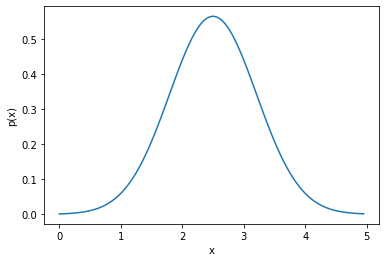

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
import numpy as np
from scipy.stats import multivariate_normal as mn

x = np.linspace(0, 5, 100, endpoint=False)
y = mn.pdf(x, mean=2.5, cov=0.5)
plt.xlabel('x')
plt.ylabel('p(x)')

plt.plot(x, y)

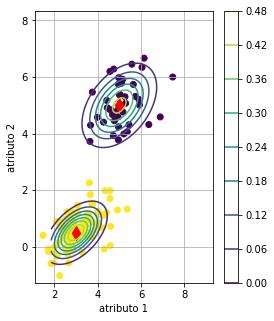

In [90]:
#clase 1 
mu1 = np.array([5,5]) #.fit -> estimar la mu1
cov1 = np.array([[0.8, 0.3],[0.3,0.6]]) #.fit -> estimar la cov1
N1 = 40 # numero puntos c1 -> estimar desde etiquetas
pdf1 = mn(mu1, cov1) # objeto scipy ara evaluar o muestrear gaussiana multivariada


#clase 2
mu2 = np.array([3,0.5]) #.fit -> estimar la mu1
cov2 = np.array([[0.5, 0.2],[0.2,0.3]]) #.fit -> estimar la cov1
N2 = 100 # numero puntos c1 -> estimar desde etiquetas
pdf2 = mn(mu2, cov2) # objeto scipy ara evaluar o muestrear gaussiana multivariada

X = np.r_[pdf1.rvs(size=N1),pdf2.rvs(size=N2)] # muestrear de las dos pdfs los datos (NO hacer esto-los datos X los ingresa el usuario)
y = np.r_[-1.0*np.ones((N1,1)),np.ones((N2,1))] #etiquetas, -1 y +1 para el problema binario

#myclass_cBayes().fit(Xtrain,ytrain), Xtrain Ntrain x P,  ytrain Ntrain

xx, yy = np.mgrid[1.25*min(X[:,0]):1.25*max(X[:,0]):.01, 1.25*min(X[:,1]):1.25*max(X[:,1]):.01] #graficar pdf en espacio de caract. 2D
pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy

plt.figure(figsize=(4,5))
plt.scatter(X[:,0],X[:,1], c=y)
plt.scatter(mu1[0],mu1[1], c='r', marker='d',s = 100)
plt.scatter(mu2[0],mu2[1], c='r', marker='d',s = 100)
plt.contour(xx, yy, pdf1.pdf(pos))
plt.contour(xx, yy, pdf2.pdf(pos))
plt.colorbar()
plt.grid()
plt.xlabel('atributo 1')
plt.ylabel('atributo 2')
plt.show()


In [91]:
x.shape + (2,)

(100, 2)

$$\Sigma_c = \begin{bmatrix} \sigma^{c,2}_1 & cov^c(1,2) & \cdots & cov^c(1,P)\\
cov^c(2,1) & \sigma^{c,2}_2 & \cdots & cov^c(2,P)\\
\vdots   & \vdots & \ddots & \vdots \\
cov^c(P,1) & cov^c(P,2) & \cdots & \sigma^{c,2}_P
\end{bmatrix}$$

In [92]:
pdf1.pdf(mu1)

0.25485187206258914

In [93]:
#mu1 = np.array([0.2,0.5])
#cov1 = np.array([[0.5, 0.3],[-0.3,0.2]])
#N1 = 100
#rv1 = mn(mu1, cov1)

In [94]:
#rv1.rvs(size=100)

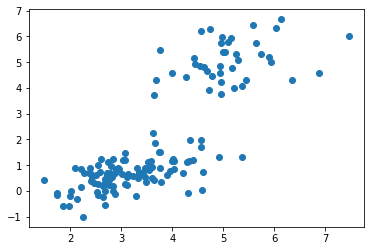

In [95]:
ye = np.c_[pdf1.pdf(X),pdf2.pdf(X)] #transform -> evaluar pdf despues de encontrar mu_c y Cov_c

plt.scatter(X[:,0],X[:,1])#,c=ye.argmax(axis=1))

(748, 961, 2)


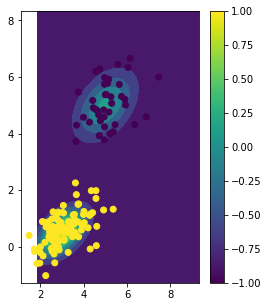

In [96]:
# predict
dc1 = pdf1.pdf(pos) # pdf1.pdf(Xtest)
dc2 = pdf2.pdf(pos) # pdf2.pdf(Xtest)
pb = np.zeros((dc1.shape[0],dc2.shape[1],2))
pb[:,:,0] = dc1 #* (N1/X.shape[0]) #marginal cada clase
pb[:,:,1] = dc2 #* (N2/X.shape[0])
#ytest_e = pb.argmax(axis=2) # etiquetas estimadas

print(pb.shape)
plt.figure(figsize=(4,5))
plt.contourf(xx, yy,pb.max(axis=2))
plt.scatter(X[:,0],X[:,1], c=y)
plt.colorbar()

In [97]:
pb.shape

(748, 961, 2)

In [98]:
X.shape

(140, 2)

In [99]:
y.shape

(140, 1)

## clasificador ingenuo (NAIVE - BAYES )


In [100]:
# estimacion priors (cuanros elementos distuntos hay (inique))
clases = np.unique(y)

In [101]:
clases

array([-1.,  1.])

In [102]:
# numero de clases 
nc = len(clases)

In [103]:
nc

2

In [104]:
prior = np.zeros((nc))
medias=np.zeros((nc,X.shape[1])) #tamaño de caracteristicas, mtris por clase y es 2X2
varianza=np.zeros((nc,X.shape[1]))
j=0
for c in clases:
  prior[j]=sum(y==c)/len(y)
  medias[j]=X[(y==c).reshape(-1)].mean(axis=0)
  varianza[j]=X[(y==c).reshape(-1)].var(axis=0)
  j+=1


In [105]:
prior

array([0.28571429, 0.71428571])

In [106]:
medias

array([[5.10810908, 5.06442908],
       [3.12231102, 0.63698966]])

In [107]:
varianza

array([[0.62915725, 0.61151098],
       [0.59927078, 0.3412241 ]])

In [108]:
X[0]

array([7.46158013, 6.00043998])

In [109]:
resultadoa = np.zeros(len(y))
resultadob = np.zeros(len(y))
tmp_list = np.zeros(nc)
y_predict = np.zeros(len(y))

In [110]:
Xnew1 = X
for i in range(len(y)):
  px = mn.pdf(Xnew1[i,0], mean=medias[0,0], cov=varianza[0,0])*prior[0]
  py = mn.pdf(Xnew1[i,1], mean=medias[0,1], cov=varianza[0,1])*prior[0]
  resultadoa[i] = px*py
  px2 = mn.pdf(Xnew1[i,0], mean=medias[1,0], cov=varianza[1,0])*prior[1]
  py2 = mn.pdf(Xnew1[i,1], mean=medias[1,1], cov=varianza[1,1])*prior[1]
  resultadob[i] = px2*py2
  if resultadoa[i] >= resultadob[i]:
    y_predict[i] = -1
  else:
    y_predict[i] = 1

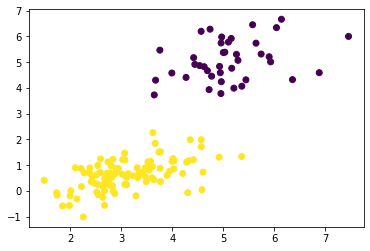

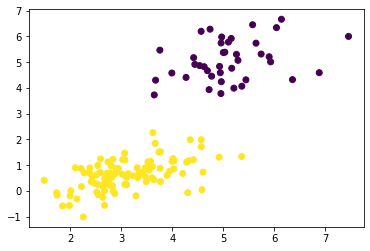

In [111]:
ind = y.reshape(-1)!=y_predict.reshape(-1)
ind.shape
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
plt.scatter(X[:,0],X[:,1],c=y_predict)
plt.scatter(X[ind,0],X[ind,1],c="r")
plt.show()

## clasificador cuadratico bayesiano

In [112]:
a1=len(X)
muA = np.mean(X[(y==1).reshape(-1)],axis=0)
muB = np.mean(X[(y==-1).reshape(-1)],axis=0)
CovA = np.cov(X[(y==1).reshape(-1)].T)
CovB = np.cov(X[(y==-1).reshape(-1)].T)
ICovA = np.linalg.inv(CovA)
ICovB = np.linalg.inv(CovB)
pA = sum(y==1)/len(y)
pB = sum(y==-1)/len(y)
print(muA, 'media A')
print(muB, 'media B')
print(' ')
print(CovA, 'varianza de A')
print(' ')
print(CovB, 'varianza de B')
print(' ')
xnew = X[10]

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import mahalanobis

cte = -0.5*np.log(np.linalg.det(CovA)) + 0.5*np.log(np.linalg.det(CovB))-np.log(pB/pA)

y_predict_cuadratico = np.zeros(a1)
i=0
for xnew in X:
  Rx = -0.5*mahalanobis(xnew,muA,ICovA)+0.5*mahalanobis(xnew,muB,ICovB) + cte
  if  Rx > 0:
    y_predict_cuadratico[i]=1
  else:
    y_predict_cuadratico[i]=-1

  i+=1

[3.12231102 0.63698966] media A
[5.10810908 5.06442908] media B
 
[[0.60532402 0.25380672]
 [0.25380672 0.34467081]] varianza de A
 
[[0.64528949 0.19815227]
 [0.19815227 0.62719075]] varianza de B
 


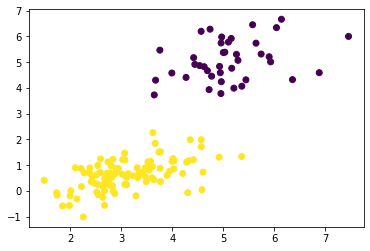

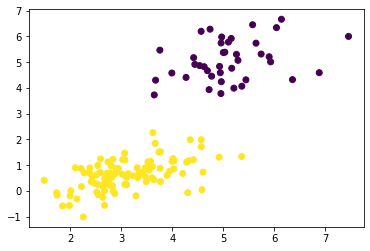

In [113]:
ind2 = y.reshape(-1)!=y_predict_cuadratico.reshape(-1)
ind2.shape
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()
plt.scatter(X[:,0], X[:,1], c = y_predict_cuadratico)
plt.scatter(X[ind,0], X[ind, 1], c = "r")

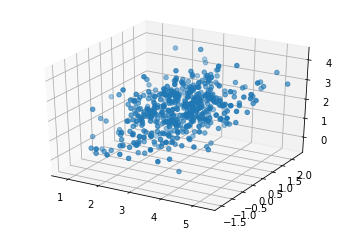

(3,) (3, 3)
[0.95506557 0.43744606 0.14593785]
(500, 2)


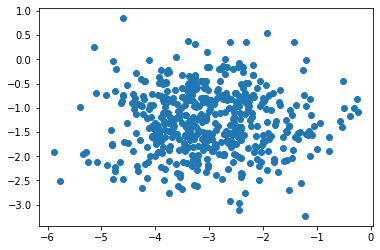

In [114]:
mu3 = np.array([3,0.5,2]) #.fit -> estimar la mu1
cov3 = np.array([[0.5, 0.2,0.1],[0.2,0.4,0.3],[0.1,0.3,0.6]]) #.fit -> estimar la cov1
N3 = 500 # numero puntos c1 -> estimar desde etiquetas
pdf3 = mn(mu3, cov3) # objeto scipy ara evaluar o muestrear gaussiana multivariada

#X = np.r_[pdf1.rvs(size=N1),pdf2.rvs(size=N2)]
X3 = pdf3.rvs(size=N3)

X3.shape
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[:,0],X3[:,1],X3[:,2])
plt.show()
#pca
C = np.cov(X3.T)
[val,vec]=np.linalg.eig(C)
print(val.shape,vec.shape)
print(val)
Z = X3 @ vec[:,:2] # N x P  P x P
print(Z.shape)
plt.scatter(Z[:,0],Z[:,1])

In [115]:
pdf1.pdf(mu1)

0.25485187206258914

In [116]:
#mu1 = np.array([0.2,0.5])
#cov1 = np.array([[0.5, 0.3],[-0.3,0.2]])
#N1 = 100
#rv1 = mn(mu1, cov1)

In [117]:
#rv1.rvs(size=100)

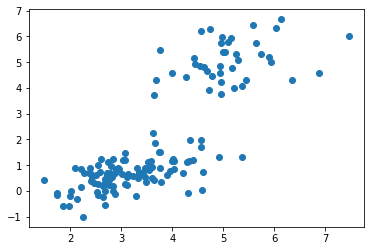

In [118]:
 ye = np.c_[pdf1.pdf(X),pdf2.pdf(X)] #transform -> evaluar pdf despues de encontrar mu_c y Cov_c

plt.scatter(X[:,0],X[:,1])#,c=ye.argmax(axis=1))

(748, 961, 2)


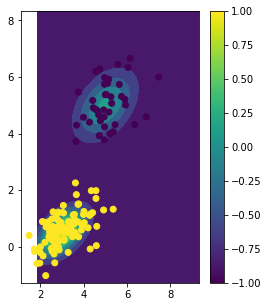

In [119]:
# predict
dc1 = pdf1.pdf(pos) # pdf1.pdf(Xtest)
dc2 = pdf2.pdf(pos) # pdf2.pdf(Xtest)
pb = np.zeros((dc1.shape[0],dc2.shape[1],2))
pb[:,:,0] = dc1 #* (N1/X.shape[0]) #marginal cada clase
pb[:,:,1] = dc2 #* (N2/X.shape[0])
#ytest_e = pb.argmax(axis=2) # etiquetas estimadas

print(pb.shape)
plt.figure(figsize=(4,5))
plt.contourf(xx, yy,pb.max(axis=2))
plt.scatter(X[:,0],X[:,1], c=y)
plt.colorbar()

In [120]:
pb.shape

(748, 961, 2)